In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt 
from matplotlib import cm
import numpy as np

## Initial conditions
# positions
x0=np.array([1, 2, 3, 3, 3, 2, 1, 1]);       
y0=np.array([1, 1, 1, 2, 3, 3, 3, 2]);

# timestep
dt=0.05;

#mass of the particles
m=np.array([1,1,1,1,1,1,1,1]);

#number of iterations
final_time=50;
NS=final_time/dt; 
nsteps=np.round(NS); 

#Interatomic potential constants
k=50.0; # Harmonic oscillator constant
req=1; # Harmonic oscillator equilibrium distance
HS=10; # Repulive soft potential 

# Topology
M=np.array([[0, 1, 0, 0, 0, 0, 0, 0],
           [1, 0, 1, 0, 0, 0, 0, 0],
           [0, 1, 0, 1, 0, 0, 0, 0],
           [0, 0, 1, 0, 1, 0, 0, 0],
           [0, 0, 0, 1, 0, 1, 0, 0],
           [0, 0, 0, 0, 1, 0, 1, 0],
           [0, 0, 0, 0, 0, 1, 0, 1],
           [0, 0, 0, 0, 0, 0, 1, 0]])
k=k*M;

# velocities
v0=0.5*(np.random.rand(2,8)-0.5);

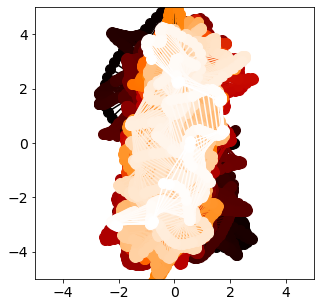

In [3]:
%matplotlib inline
# Setup figure for plotting the trajectory

figure, axes = plt.subplots(figsize=(5, 5))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
axes.set_xlim([-5,5]);
axes.set_ylim([-5,5]);

## Compute a trajectory with the Verlet Algorithm
# Initialise positions at t-dt
xp=x0;
yp=y0;

# Position at time t
x=xp+v0[0,:]*dt;
y=yp+v0[1,:]*dt;

# Position at time t+dt
xnew=np.zeros(np.shape(x0));
ynew=np.zeros(np.shape(x0));

# time
time=np.arange(0,nsteps);
color=iter(cm.gist_heat(np.linspace(0,1,np.size(time)+1)))
xx=np.zeros((np.size(time),np.size(x)));xx[0]=x0
yy=np.zeros((np.size(time),np.size(y)));yy[0]=y0
time[0]=0;
time[1]=time[0]+dt;

# Initialise Energy Potential and Kinetic
POT=np.zeros(np.shape(time));
KIN=np.zeros(np.shape(time));

# Start integrating
for timestep in np.arange(1,nsteps):
    c=next(color)
    timestep=int(timestep)
    
    # Initialise force vectors
    fx=np.zeros(np.size(x0));  
    fy=np.zeros(np.size(x0)); 
    
    # Compute distances and the interparticle forces
    for i in np.arange(0,np.size(x0)):
        for j in np.arange(i+1,np.size(x0)):
            
            r=np.sqrt((x[i]-x[j])*(x[i]-x[j])+(y[i]-y[j])*(y[i]-y[j]));     
               
            cx=-(k[i,j]*(r-req)-2*HS/(np.power(r,3)))*((x[i]-x[j]))/r;
            cy=-(k[i,j]*(r-req)-2*HS/(np.power(r,3)))*((y[i]-y[j]))/r;  
                
            fx[i]=fx[i]+cx;      
            fx[j]=fx[j]-cx;
            
            fy[i]=fy[i]+cy;
            fy[j]=fy[j]-cy;
           
       
    #Verlet integration
    for i in np.arange(0,np.size(x0)):
        r=np.sqrt(np.power(x[i],2)+np.power(y[i],2));
        xnew[i]=2*x[i]-xp[i]+(dt*dt)*fx[i]/m[i];
        ynew[i]=2*y[i]-yp[i]+(dt*dt)*fy[i]/m[i];
    
    # Compute velocity     
    vx=(xnew-xp)/2/dt;
    vy=(ynew-yp)/2/dt;
    v=np.sqrt(np.power(vx,2)+np.power(vy,2)); 
    
    # Assign positions
    xp=x; yp=y; x=xnew-np.mean(xnew); y=ynew-np.mean(ynew);
    
    
    line, = axes.plot(x,y,marker='o',color=c,markersize=10,linestyle='-')
    
    ## Store trajectory for animation
    xx[timestep]=x;
    yy[timestep]=y;


In [4]:
%%capture
%matplotlib inline
from matplotlib.animation import FuncAnimation
from matplotlib import animation, rc
from IPython.display import HTML

fig, ax = plt.subplots(figsize=(5, 5))
line, = ax.plot([]) 
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
line, = ax.plot([], [], lw=2, marker='o', markersize=15, linestyle='-.')
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

def animate(frame_num):
    x=xx[frame_num,:]
    y=yy[frame_num,:]
    line.set_data((x, y))
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.size(np.arange(1,nsteps)), interval=50);

In [5]:
HTML(anim.to_html5_video())